In [30]:
from dataset.svw import SVW
from model.train_notebooks._notebook_utils import DEFAULT_CLASSES, print_shapes, plot_histogram

from model.abc_model import ABCModel
from model.frame import Frame  # noqa
from model.skeletons import Skeletons  # noqa
from model.concated import Concated  # noqa
from model.concated_frame import ConcatedFrame  # noqa
from model.skconcated import Skconcated  # noqa
from model.sp import Sp  # noqa
from model.sp_frame import SpFrame  # noqa
from model.sp_concated_frame import SpConcatedFrame # noqa
from model.sk_frame import SkFrame
from model.sk_concated_frame import SkConcatedFrame

svw = SVW(classes=DEFAULT_CLASSES)
ABCModel.CLASSES_NUMBER = len(svw.classes)

model =ConcatedFrame()

Num GPUs Available:  1
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 256)]    0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 64, 256)]    0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 64, 256)]    0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 64, 256)]    0           []                               
                                                                       

In [31]:
x_train, y_train, x_test, y_test, _, videos_test, histogram_train, histogram_test = svw.get_as_x_y(
    max_person_number=model.PERSON_LIMIT,
    feature_types=model.get_required_features_names(),
    use_full_dump=False, use_videos_dump=False,split_id=1
)

  0%|          | 0/4175 [00:00<?, ?it/s]

100%|██████████| 4175/4175 [03:41<00:00, 18.87it/s, current video=/home/rafa/SVW/Videos/baseball/2423___9845e29ab87745b082bfc50800996641.mp4, loaded videos=3912]       
7it [00:03,  2.09it/s]
7it [00:01,  4.71it/s]


In [32]:
print_shapes(x_train, y_train, x_test, y_test)

(7411, 64, 256)
[7411    1]
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
[3162    1]
(7411, 64, 256)
[7411    1]
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
[3162    1]
(7411, 64, 256)
[7411    1]
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
[3162    1]
(7411, 64, 256)
[7411    1]
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
[3162    1]
(7411, 64, 256)
[7411    1]
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
[3162    1]
(7411, 64, 256)
[7411    1]
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
[3162    1]
(7411, 64, 256)
[7411    1]
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 256)
(3162, 64, 2

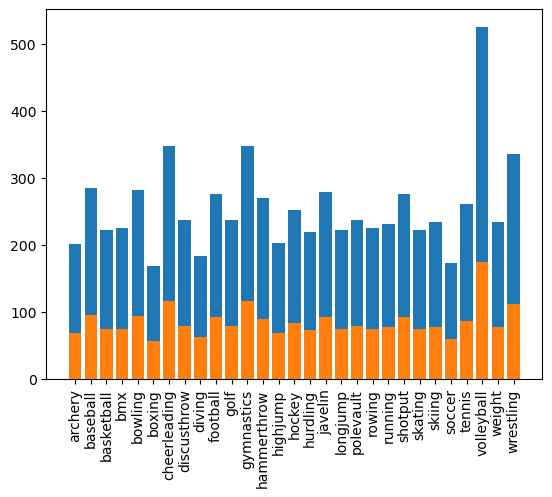

In [33]:
plot_histogram(histogram_train)

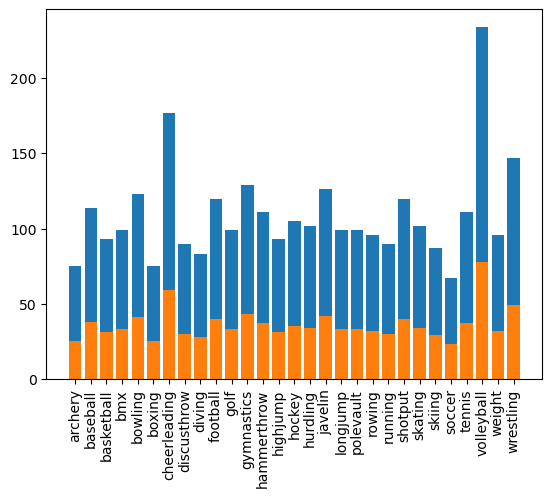

In [34]:
plot_histogram(histogram_test)

In [35]:
from time import time
start = time()
history = model.train(50, x_train, y_train, x_test, y_test)
print(time() - start)



Epoch 1/50
232/232 [==============================] - 58s 193ms/step - loss: 3.0141 - accuracy: 0.2058 - val_loss: 2.7816 - val_accuracy: 0.3185
Epoch 2/50
232/232 [==============================] - 44s 190ms/step - loss: 1.9207 - accuracy: 0.5372 - val_loss: 1.5313 - val_accuracy: 0.6120
Epoch 3/50
232/232 [==============================] - 41s 178ms/step - loss: 1.1132 - accuracy: 0.7242 - val_loss: 1.1176 - val_accuracy: 0.6860
Epoch 4/50
232/232 [==============================] - 41s 179ms/step - loss: 0.7398 - accuracy: 0.8154 - val_loss: 0.9487 - val_accuracy: 0.7239
Epoch 5/50
232/232 [==============================] - 42s 181ms/step - loss: 0.5135 - accuracy: 0.8768 - val_loss: 0.8721 - val_accuracy: 0.7391
Epoch 6/50
232/232 [==============================] - 40s 173ms/step - loss: 0.3663 - accuracy: 0.9192 - val_loss: 0.8324 - val_accuracy: 0.7495
Epoch 7/50
232/232 [==============================] - 36s 157ms/step - loss: 0.2581 - accuracy: 0.9507 - val_loss: 0.7923 - val_ac

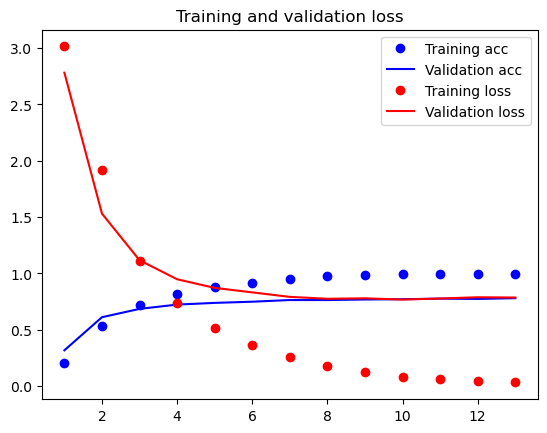

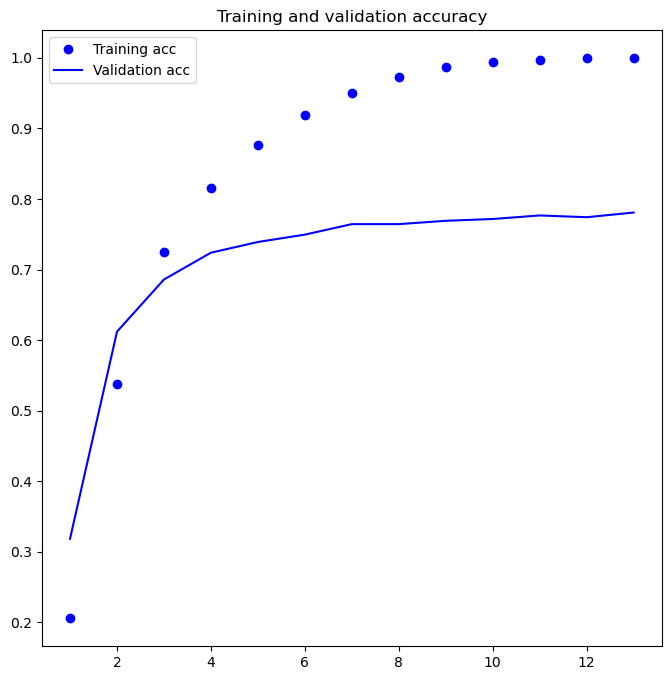

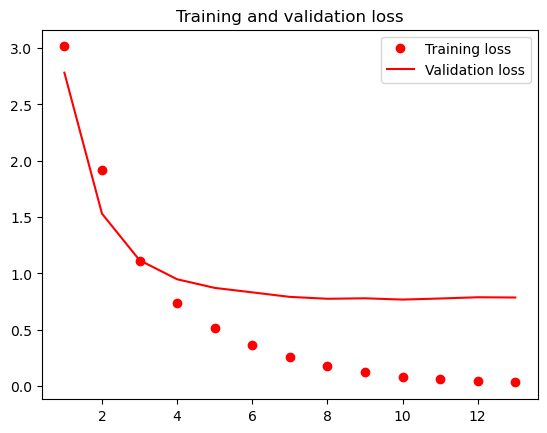

In [36]:
model.plot_history(history)

In [37]:
acc, y_pred, y_true = model.evaluate_weighted_avg(x_test, videos_test, svw.translate_class)
acc


99/99 [==============================] - 8s 50ms/step


0.8227488151658767

In [38]:
import numpy as np
swimming_true = np.array(["swimming", "swimming","swimming","swimming","swimming","swimming","swimming","swimming", "swimming","swimming","swimming","swimming",], dtype='O')
swimming_pred = np.array(["swimming", "swimming","swimming","swimming","swimming","swimming","swimming","diving", "swimming","swimming","skiing","diving",], dtype='O')
y_true = np.concatenate((y_true, swimming_true), axis=0)
y_pred = np.concatenate((y_pred, swimming_pred), axis=0)


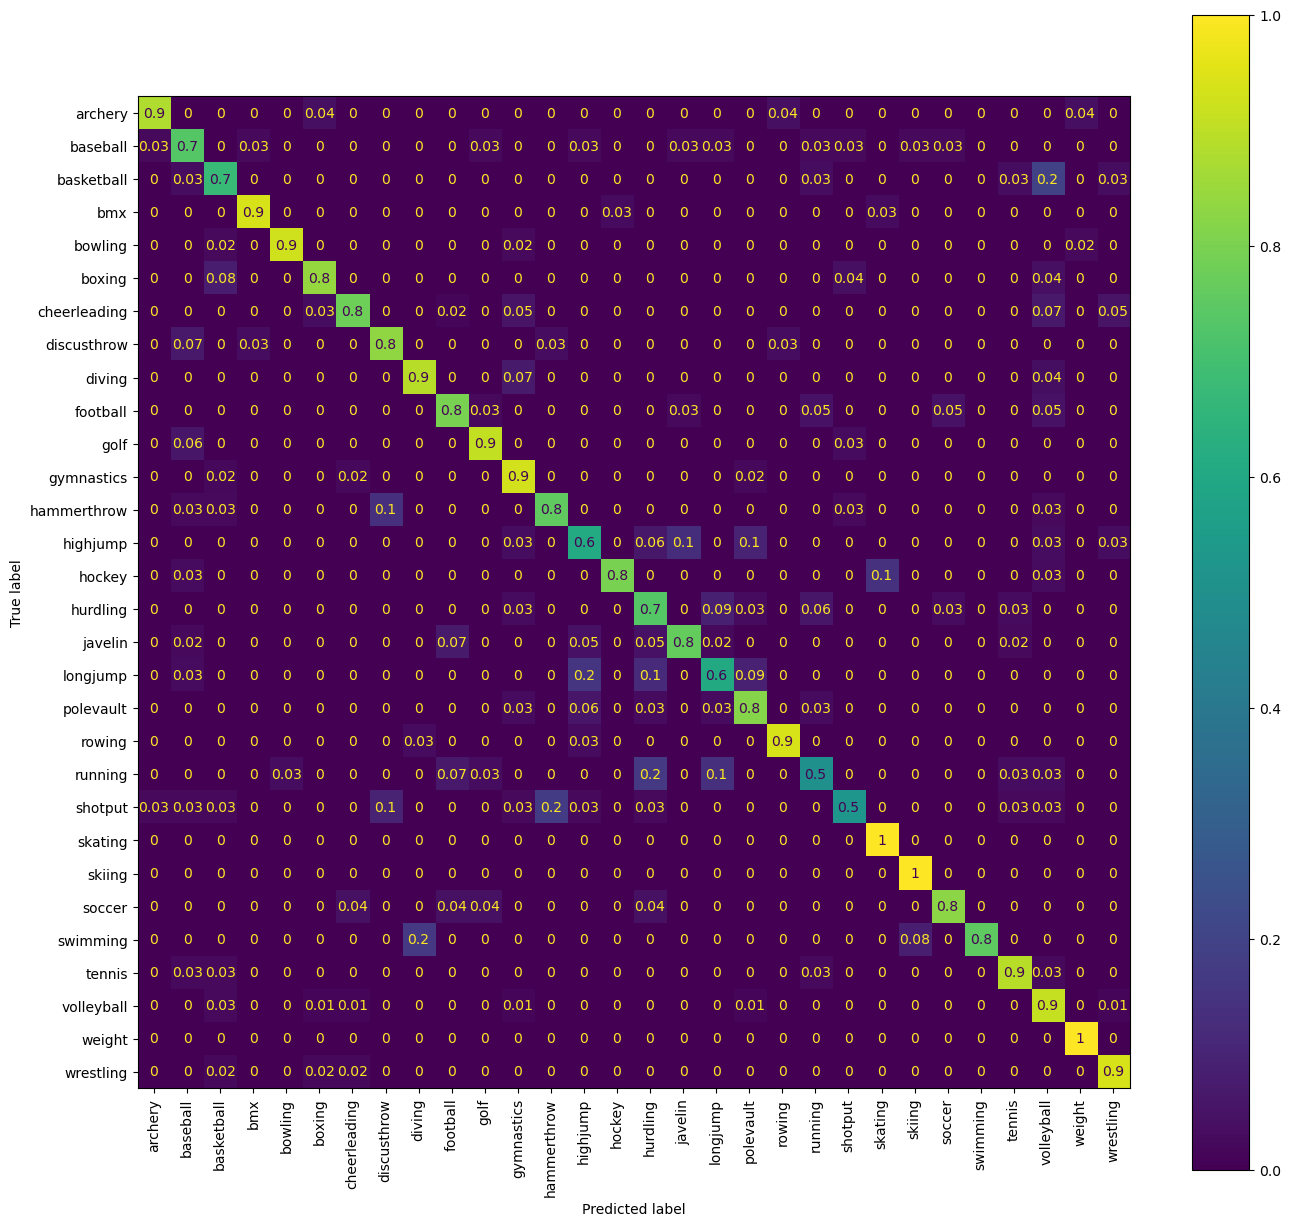

In [39]:

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(16,15))
ax.xlabel = "asdf"
cmp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true', values_format=".1g", xticks_rotation=90, ax=ax)
#
# cmp.plot(ax=ax)
#
plt.savefig('confusion_matrix.png', dpi=200)